# <font color='tomato'>Land Cover Classification in Satellite Imagery using Python</font>

In [ ]:
!pip install earthpy gdal

     |████████████████████████████████| 1.4 MB 21.9 MB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 15.4 MB 54.7 MB/s 
     |████████████████████████████████| 6.3 MB 59.5 MB/s 


# Import Modules

In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/Blue Sky Analytics/2019/*B?*.TIF")
S_sentinel_bands.sort()
S_sentinel_bands

['/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B1.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B2.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B3.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B4.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B5.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B6.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2019/LC08_L1TP_147040_20190505_20190520_01_T1_B7.TIF']

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [ ]:
arr_st = np.stack(l)

In [ ]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 7741
Width: 7591
Bands: 7


# Visualize Data

## Bands

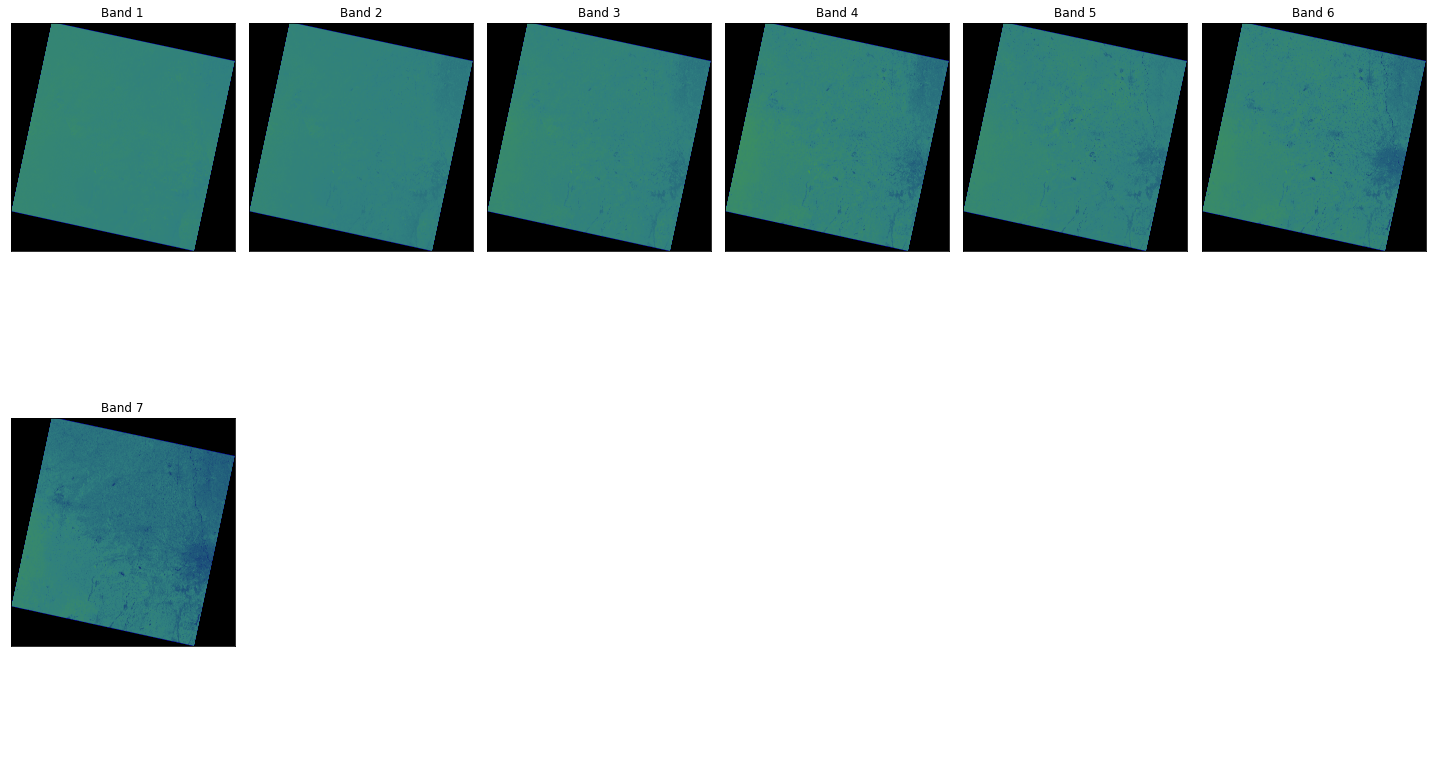

In [ ]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

## RGB Composite Image

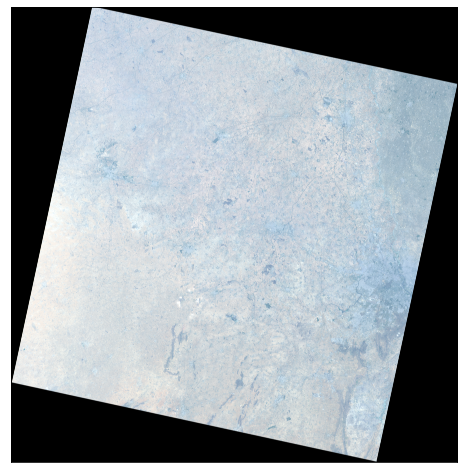

In [ ]:
ep.plot_rgb(
    arr_st,
    rgb=(3,2,1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

## Data Distribution of Bands

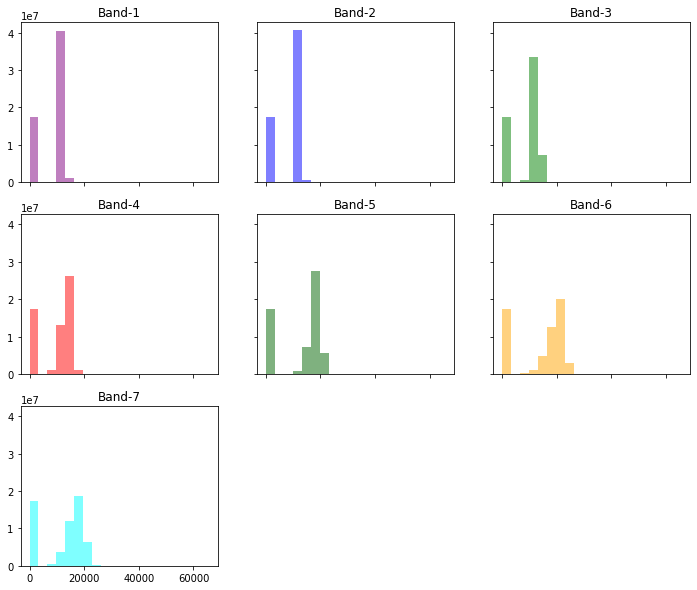

In [ ]:
colors = ['purple', 'blue', 'Green', 'red', 'darkgreen', 'orange', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

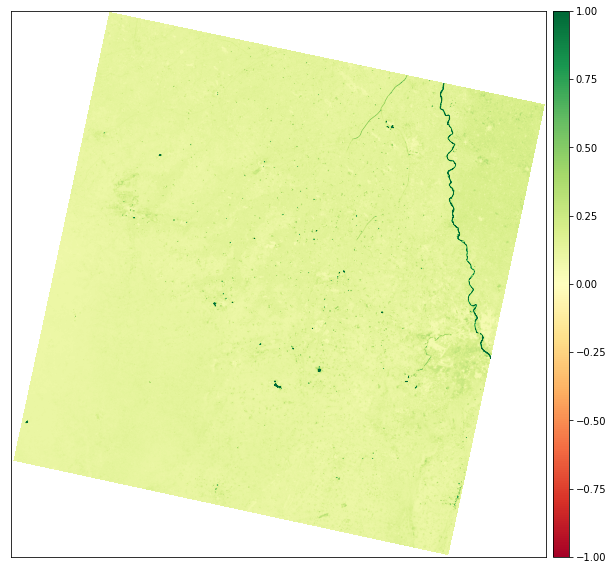

In [ ]:
ndvi = es.normalized_diff(arr_st[4], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

In [ ]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.6, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999)

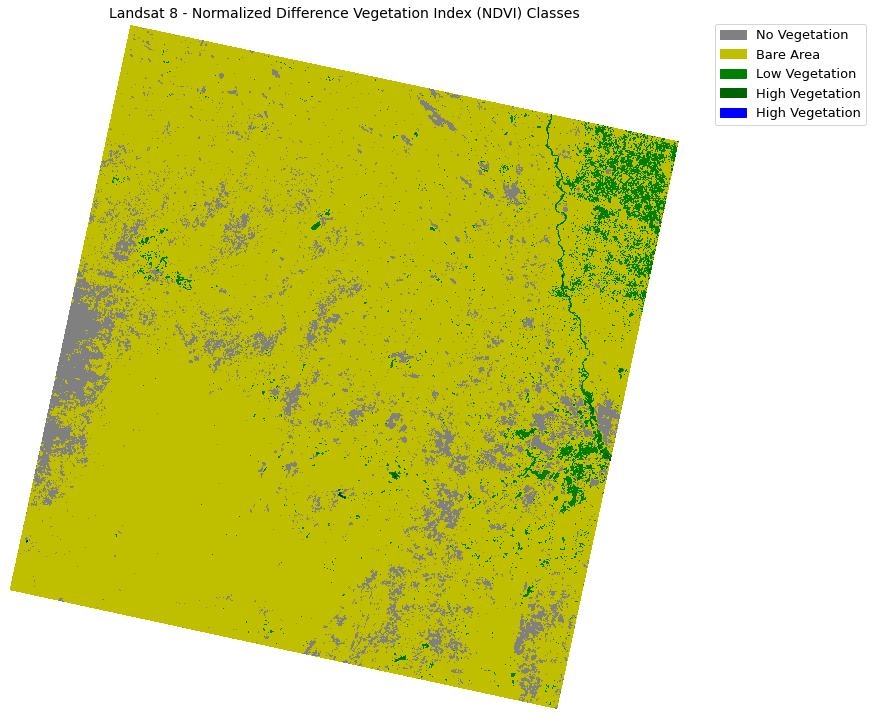

In [ ]:
# Define color map
nbr_colors = ["gray", "y", "g", "darkgreen", "blue"]#2019
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "High Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
img = ndvi_landsat_class.reshape(ndvi_landsat_class.shape[0]*ndvi_landsat_class.shape[1],1)
img.shape

(58761931, 1)

In [ ]:
clf = KMeans(n_clusters = 3)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_

In [ ]:
counts = Counter(color_labels) #2019
counts

Counter({0: 35784035, 1: 17355591, 2: 5622305})

In [ ]:
counts_2019 = counts
delhi_2019 = counts_2019[1]
delhi_2019

17355591

In [ ]:
label = ['No Vegetation', 'Bare-Area', 'Vegetation']
hex_colors = [ '#8B8B8B','#F9C41D','#3FC228']

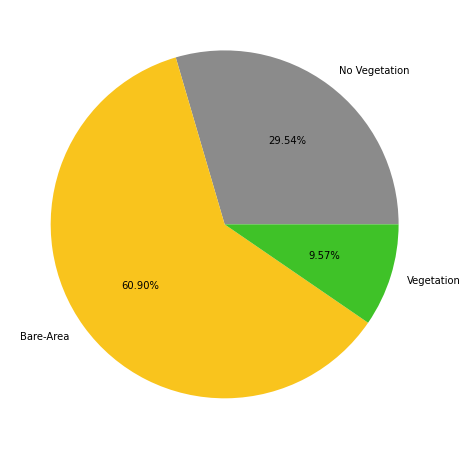

In [ ]:
plt.figure(figsize = (12,8)) #2019
plt.pie(counts.values(), labels = label, colors = hex_colors, autopct='%1.02f%%')
plt.show()

## For 2022

In [ ]:
S_sentinel_bands_2022 = glob("/content/drive/MyDrive/Blue Sky Analytics/2022/*B?*.TIF")
S_sentinel_bands_2022.sort()
S_sentinel_bands_2022

['/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B1.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B2.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B3.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B4.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B5.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B6.TIF',
 '/content/drive/MyDrive/Blue Sky Analytics/2022/LC08_L1TP_147040_20211220_20211229_01_T1_B7.TIF']

In [ ]:
l = []
for i in S_sentinel_bands_2022:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [ ]:
arr_st_22 = np.stack(l)

In [ ]:
print(f'Height: {arr_st_22.shape[1]}\nWidth: {arr_st_22.shape[2]}\nBands: {arr_st_22.shape[0]}')

Height: 7741
Width: 7591
Bands: 7


# Visualize Data for 2022

### Bands

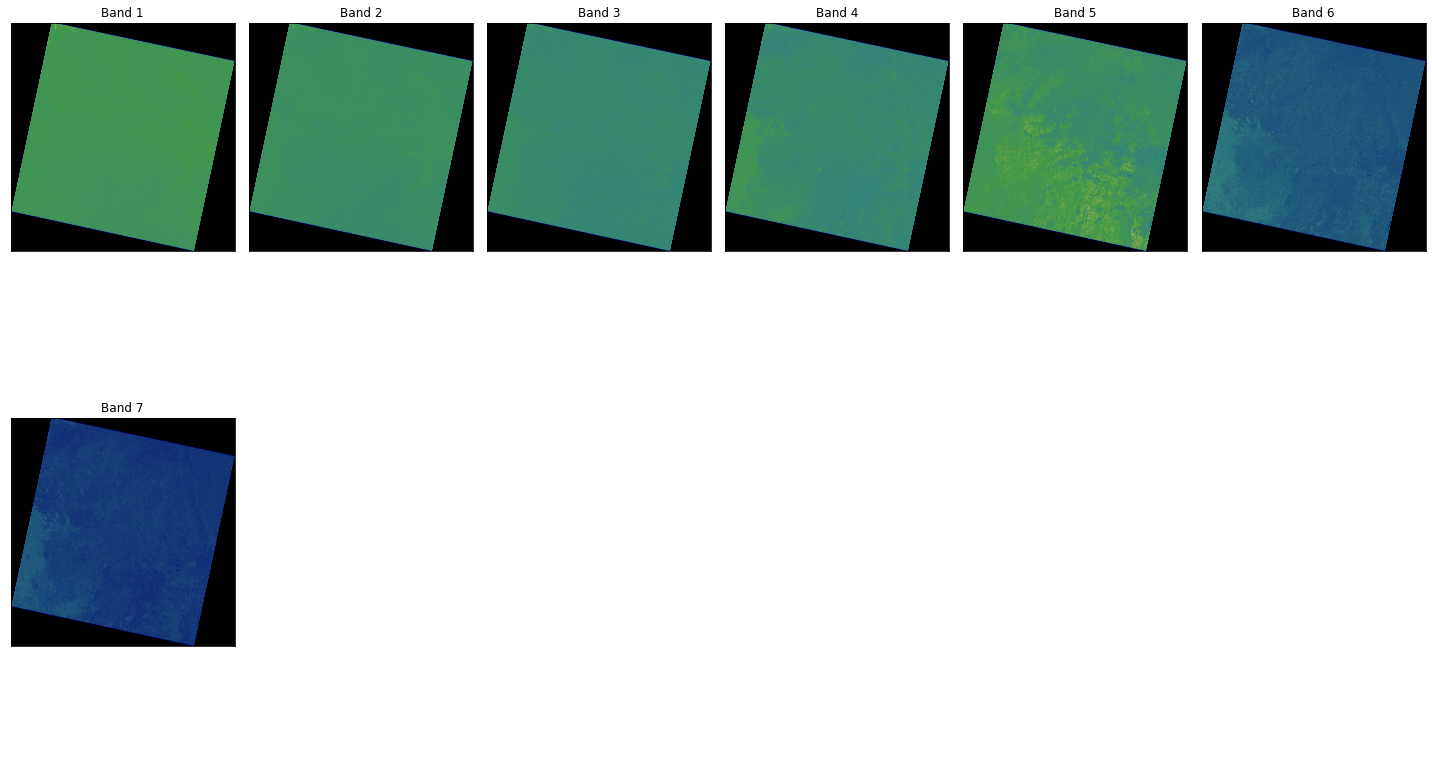

In [ ]:
ep.plot_bands(arr_st_22, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

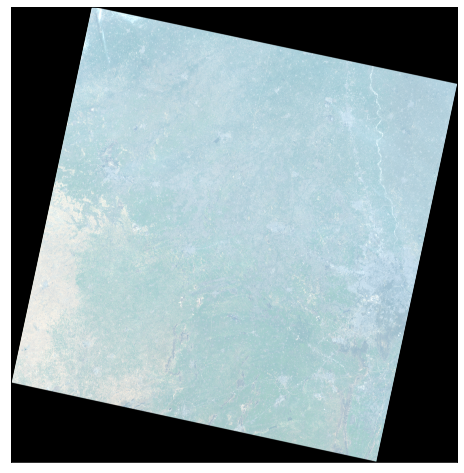

In [ ]:
ep.plot_rgb(
    arr_st_22,
    rgb=(3,2,1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

## Data Distribution of Bands 2022

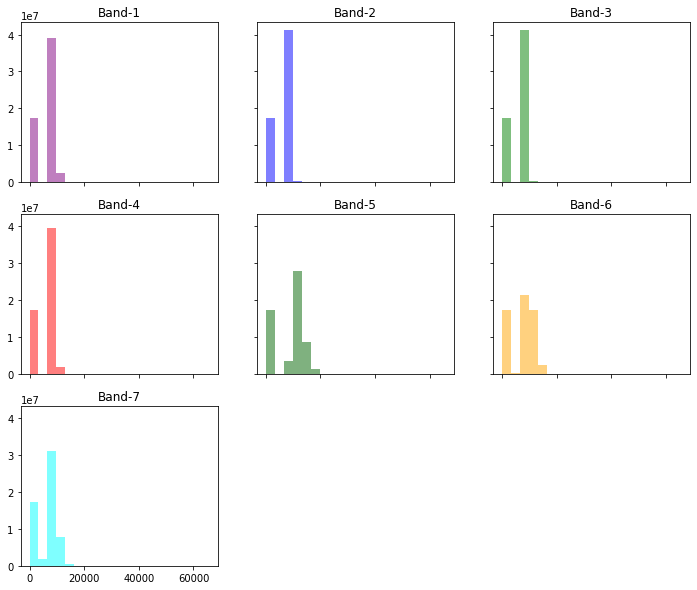

In [ ]:
colors = ['purple', 'blue', 'Green', 'red', 'darkgreen', 'orange', 'cyan']

ep.hist(arr_st_22, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

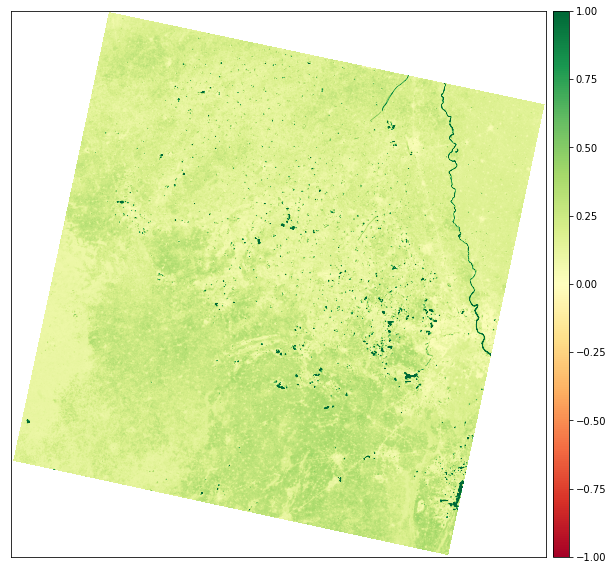

In [ ]:
ndvi = es.normalized_diff(arr_st_22[4], arr_st_22[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

In [ ]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.6, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999)

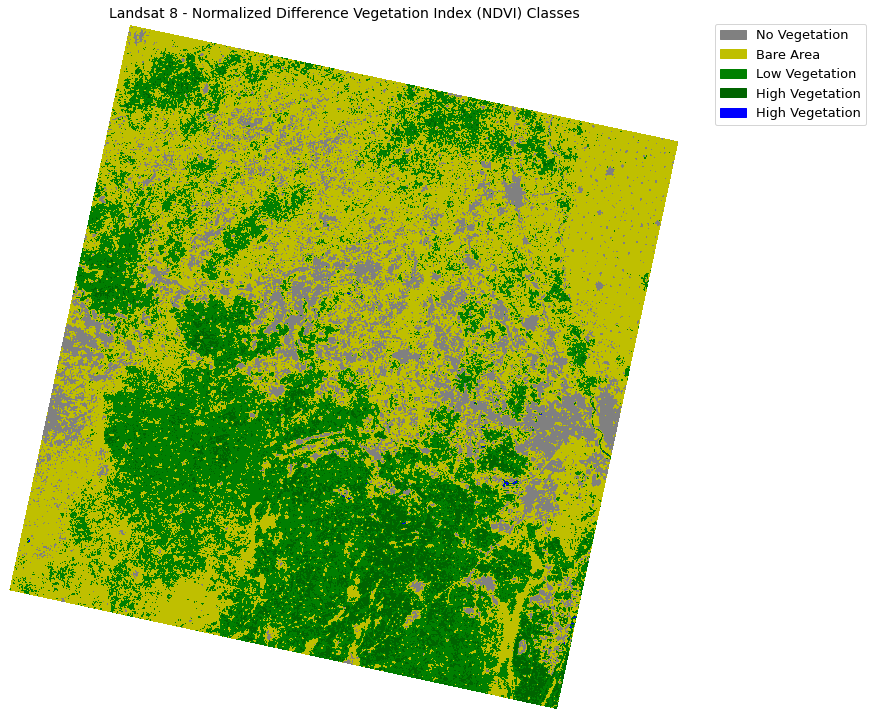

In [ ]:
# Define color map
nbr_colors = ["gray", "y", "g", "darkgreen", "blue"]#2022
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "High Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [ ]:
img_22 = ndvi_landsat_class.reshape(ndvi_landsat_class.shape[0]*ndvi_landsat_class.shape[1],1)
img_22.shape

(58761931, 1)

In [ ]:
clf = KMeans(n_clusters = 3)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_

In [ ]:
counts = Counter(color_labels)#2022

In [ ]:
counts_2022 = counts
delhi_2022 = counts_2022[1]
delhi_2022

17288194

In [ ]:
label = ['No Vegetation', 'Bare-Area', 'Vegetation']
hex_colors = [ '#8B8B8B','#F9C41D','#3FC228']

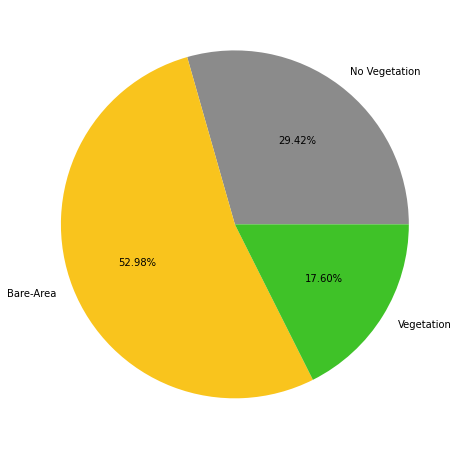

In [ ]:
plt.figure(figsize = (12,8)) #2019
plt.pie(counts_22.values(), labels = label, colors = hex_colors, autopct='%1.02f%%')
plt.show()